In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show tensorflow

ERROR: Exception:
Traceback (most recent call last):
  File "/Users/gauravkumar/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/Users/gauravkumar/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gauravkumar/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/Users/gauravkumar/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "

In [1]:
import pandas_datareader as dtr
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np




In [3]:
start='2012-01-01'
end= '2022-12-30'

data = yf.download('AAPL',start,end)

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586559,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859333,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838935,394024400


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-22,134.350006,134.559998,130.300003,132.229996,132.229996,77852100
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700


In [170]:
print("Current price of Stock is {}" .format(data.Close[len(data)-1]))

Current price of Stock is 129.61000061035156


In [5]:
data.shape

(2767, 6)

In [6]:
data = data.reset_index()

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586559,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859333,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838935,394024400


In [8]:
# As our model will be only based on closed price so we will drop all remaining coloumn. why?
# as the closing price of a stock are the key determing feature to tell whether stock are in uptrend or downtrend.

data= data.drop(["Adj Close","Volume"],axis=1)

In [9]:
data.head()

,Date,Open,High,Low,Close
0,2012-01-03,14.621429,14.732143,14.607143,14.686786
1,2012-01-04,14.642857,14.810000,14.617143,14.765714
2,2012-01-05,14.819643,14.948214,14.738214,14.929643
3,2012-01-06,14.991786,15.098214,14.972143,15.085714
4,2012-01-09,15.196429,15.276786,15.048214,15.061786


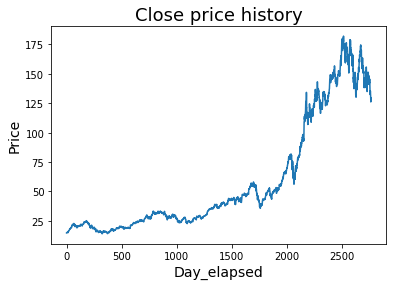

In [10]:
# plotting the closing price for better visulaization
plt.plot(data.Close)
plt.title("Close price history", fontsize=18)
plt.xlabel('Day_elapsed', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

In [11]:
# Moving average is impotant charterstics for determing how stock is performing

ma100= data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2762    150.858300
2763    150.515600
2764    150.157800
2765    149.764699
2766    149.412100
Name: Close, Length: 2767, dtype: float64

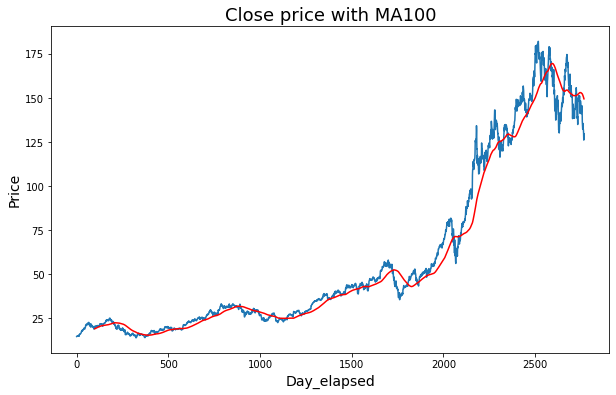

In [12]:
plt.figure(figsize=(10,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.title("Close price with MA100", fontsize=18)
plt.xlabel('Day_elapsed', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

In [13]:
# As tradinationl trading algorithms say when 100 day moving average crosses 200 day moving average , there is change of trend in share price

ma200 = data.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2762    152.2664
2763    152.1331
2764    152.0096
2765    151.8867
2766    151.7593
Name: Close, Length: 2767, dtype: float64

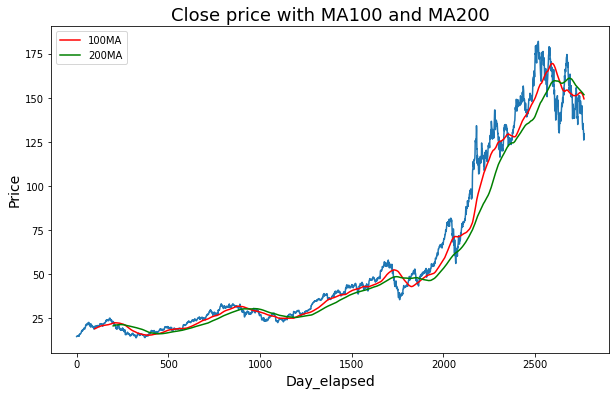

In [181]:
plt.figure(figsize=(10,6))
plt.plot(data.Close)
plt.plot(ma100, 'r' , label= "100MA")
plt.plot(ma200, 'g', label= '200MA')
plt.title("Close price with MA100 and MA200", fontsize=18)
plt.xlabel('Day_elapsed', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.legend()
plt.show()

In [15]:
data.shape

(2767, 5)

In [16]:
# Spliting data into training and test set

data_train = pd.DataFrame(data.Close[0:int(len(data)* .7)])
data_test = pd.DataFrame(data.Close[int(len(data)* .7):len(data)])


print(data_train.shape)
print(data_test.shape)

(1936, 1)
(831, 1)


In [17]:
data_train.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [18]:
# Doing feature scaling as we will apply LSTM

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [19]:
train_data = scaler.fit_transform(data_train)
train_data


array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.91280911],
       [0.95189465],
       [0.94905826]])

In [20]:
train_data.shape

(1936, 1)

In [21]:
# We will use previous 100 day price of share price in lstm model to predict next day price.
# So let us create new x_train and y_train

x_train=[]
y_train=[]


In [22]:
for i in range(100,train_data.shape[0]):
    x_train.append(train_data[i-100:i])
    y_train.append(train_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)    


In [23]:
print(x_train)

[[[0.01677525]
  [0.01856622]
  [0.02228596]
  ...
  [0.13488283]
  [0.14589615]
  [0.14164965]]

 [[0.01856622]
  [0.02228596]
  [0.02582741]
  ...
  [0.14589615]
  [0.14164965]
  [0.13919412]]

 [[0.02228596]
  [0.02582741]
  [0.02528444]
  ...
  [0.14164965]
  [0.13919412]
  [0.14728189]]

 ...

 [[0.83582935]
  [0.83997047]
  [0.84377123]
  ...
  [0.89340817]
  [0.89329469]
  [0.89845695]]

 [[0.83997047]
  [0.84377123]
  [0.86050595]
  ...
  [0.89329469]
  [0.89845695]
  [0.91280911]]

 [[0.84377123]
  [0.86050595]
  [0.8586907 ]
  ...
  [0.89845695]
  [0.91280911]
  [0.95189465]]]


In [24]:
x_train.shape

(1836, 100, 1)

In [25]:
y_train.shape

(1836,)

In [26]:
# Applying LSTM model



In [27]:
model = tf.keras.models.Sequential()

In [28]:
model.add(tf.keras.layers.LSTM(50, activation ='relu', return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(60, activation ='relu', return_sequences= True))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(80, activation ='relu', return_sequences= True ))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(50, activation ='relu', return_sequences= True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(120, activation ='relu' ))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           2

In [30]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 35s 448ms/step - loss: 0.0527
Epoch 2/50
58/58 [==============================] - 18s 318ms/step - loss: 0.0125
Epoch 3/50
58/58 [==============================] - 18s 318ms/step - loss: 0.0092
Epoch 4/50
58/58 [==============================] - 19s 321ms/step - loss: 0.0082
Epoch 5/50
58/58 [==============================] - 19s 334ms/step - loss: 0.0080
Epoch 6/50
58/58 [==============================] - 18s 319ms/step - loss: 0.0067
Epoch 7/50
58/58 [==============================] - 19s 319ms/step - loss: 0.0066
Epoch 8/50
58/58 [==============================] - 18s 318ms/step - loss: 0.0062
Epoch 9/50
58/58 [==============================] - 19s 321ms/step - loss: 0.0058
Epoch 10/50
58/58 [==============================] - 19s 319ms/step - loss: 0.0058
Epoch 11/50
58/58 [==============================] - 19s 321ms/step - loss: 0.0064
Epoch 12/50
58/58 [==============================] - 19s 321ms/step - loss: 0.0054
Epoch 13/50
5

In [182]:
model.save("share_model.h5")

In [31]:
data_test.head()

,Close
1936,54.687500
1937,54.974998
1938,55.174999
1939,55.692501
1940,55.240002


In [32]:
data_train.tail(100)

,Close
1836,51.869999
1837,51.790001
1838,51.320000
1839,51.075001
1840,51.152500
...,...
1931,53.314999
1932,53.542500
1933,54.174999
1934,55.897499


In [33]:
past_100_days= data_train.tail(100)

In [34]:
final_data_test = past_100_days.append(data_test , ignore_index = True)


In [46]:
test_data = scaler.transform(final_data_test)
test_data

array([[0.06161444],
       [0.06103761],
       [0.05764862],
       [0.05588204],
       [0.05644085],
       [0.04933842],
       [0.0670945 ],
       [0.06462486],
       [0.06931175],
       [0.06341709],
       [0.05328622],
       [0.05335832],
       [0.04942856],
       [0.04304718],
       [0.02238886],
       [0.02768865],
       [0.03176262],
       [0.0302484 ],
       [0.02830154],
       [0.0176479 ],
       [0.0239752 ],
       [0.01708908],
       [0.01146483],
       [0.010221  ],
       [0.00888703],
       [0.0073548 ],
       [0.00901323],
       [0.00319069],
       [0.        ],
       [0.01142877],
       [0.01665643],
       [0.02148754],
       [0.03037457],
       [0.03475502],
       [0.03877491],
       [0.03765728],
       [0.03758516],
       [0.03504345],
       [0.03711648],
       [0.04533655],
       [0.04429101],
       [0.04715724],
       [0.04593142],
       [0.0455709 ],
       [0.04014494],
       [0.04777013],
       [0.04766197],
       [0.044

In [47]:
test_data.shape

(931, 1)

In [48]:
x_test = []
y_test = []

In [49]:
for i in range(100,test_data.shape[0]):
  x_test.append(test_data[i-100:i])
  y_test.append(test_data[i,0])

x_test , y_test = np.array(x_test), np.array(y_test)  
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [50]:
predictions= model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

26/26 [==============================] - 3s 95ms/step


In [51]:
rmse = np.sqrt(np.mean(predictions- y_test)**2 )
rmse

121.62160609028157

In [52]:
y_test = np.reshape(y_test, (len(y_test),1))

In [53]:
y_test = scaler.inverse_transform(y_test)

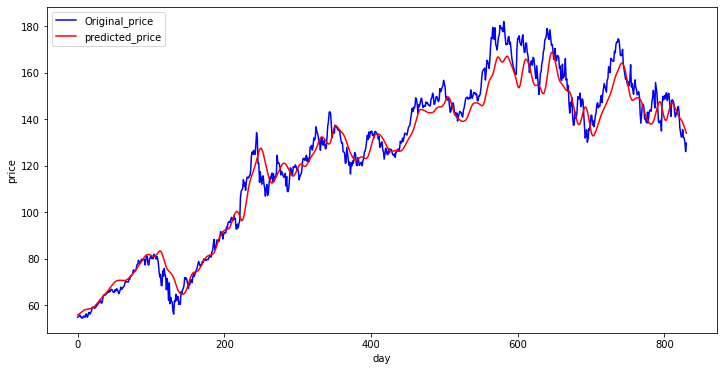

In [54]:
# plot the data
plt.figure(figsize=(12,6))
plt.plot(y_test,  'b', label='Original_price')
plt.plot(predictions, 'r', label='predicted_price')
plt.xlabel('day')
plt.ylabel('price')
plt.legend()
plt.show()

<ipython-input-173-1597f06ef994>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


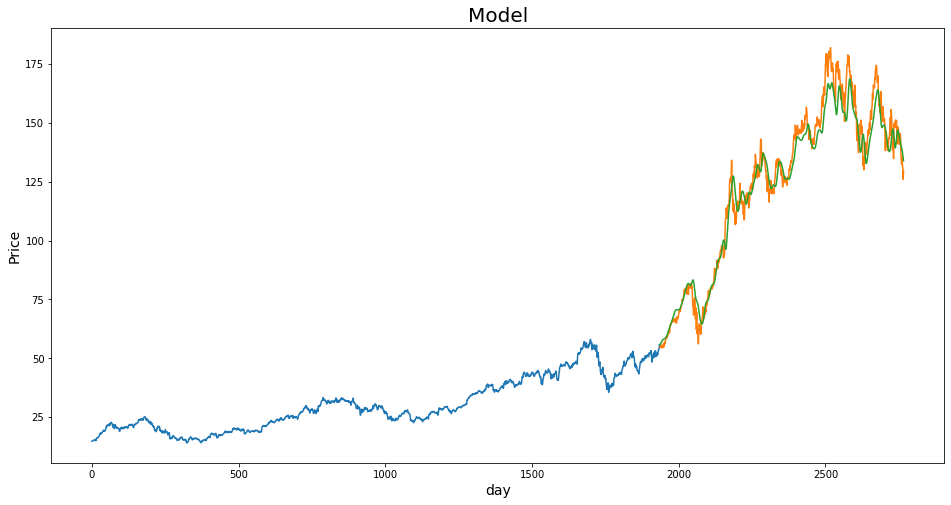

In [173]:
# plot the data 
train = data[:int(len(data)* .7)]
valid = data[int(len(data)* .7):]
valid['Predictions'] = predictions
# visualise the data 
plt.figure(figsize=(16,8))
plt.title('Model', fontsize= 20)
plt.xlabel('day' , fontsize=14)
plt.ylabel('Price' , fontsize = 14)
plt.plot(train['Close'])
plt.plot(valid[['Close' ,'Predictions']])
plt.show()

In [167]:
# predicting next day price 
x_data_1= x_test[-1,:]
x_data_1 = x_data_1.reshape(1,100,1)
yhat = model.predict(x_data_1, verbose=1)
yhat = scaler.inverse_transform(yhat)
print("Next day predicted price is {}" .format(yhat[0][0]))


1/1 [==============================] - 0s 93ms/step
Next day predicted price is 133.90321350097656


array([[133.90321]], dtype=float32)

In [45]:
valid

,Date,Open,High,Low,Close,Predictions
1936,2019-09-13,55.000000,55.197498,54.255001,54.687500,55.737225
1937,2019-09-16,54.432499,55.032501,54.389999,54.974998,55.924229
1938,2019-09-17,54.990002,55.205002,54.779999,55.174999,56.144936
1939,2019-09-18,55.264999,55.712502,54.860001,55.692501,56.390297
1940,2019-09-19,55.502499,55.939999,55.092499,55.240002,56.652054
...,...,...,...,...,...,...
2762,2022-12-22,134.350006,134.559998,130.300003,132.229996,137.734406
2763,2022-12-23,130.919998,132.419998,129.639999,131.860001,136.843628
2764,2022-12-27,131.380005,131.410004,128.720001,130.029999,135.886963
2765,2022-12-28,129.669998,131.029999,125.870003,126.040001,134.903336


In [137]:
l= len(test_data)
l

931

In [138]:
x_input = test_data[l-100:].reshape([1, 100])
x_input.shape

(1, 100)

In [139]:

x_input

array([[0.87677112, 0.9079209 , 0.90251296, 0.92854318, 0.93640269,
        0.93524897, 0.94620909, 0.94332479, 0.92436103, 0.89587924,
        0.89342756, 0.89559075, 0.91361722, 0.86739734, 0.8512457 ,
        0.83343554, 0.82124963, 0.82658551, 0.81108268, 0.80185314,
        0.81216434, 0.80134846, 0.82233118, 0.86602731, 0.79687782,
        0.80747739, 0.78627825, 0.77423659, 0.80149259, 0.81894219,
        0.79601259, 0.78894624, 0.7722897 , 0.77474138, 0.78187979,
        0.76803548, 0.71496557, 0.68410427, 0.71474926, 0.74106796,
        0.74323105, 0.73623677, 0.69773227, 0.70011178, 0.68972852,
        0.68511375, 0.71864303, 0.68540223, 0.71446088, 0.72412304,
        0.72491621, 0.72152722, 0.74950433, 0.76522335, 0.78606194,
        0.76450236, 0.73169418, 0.810578  , 0.79327253, 0.77387604,
        0.73335258, 0.68900752, 0.68540223, 0.6892959 , 0.69347805,
        0.66009301, 0.74662003, 0.767026  , 0.75678698, 0.76947757,
        0.76046434, 0.77438083, 0.77849081, 0.75

In [140]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [141]:
len(temp_input)

100

In [142]:
temp_input

[0.8767711208218392,
 0.9079209028393249,
 0.9025129637411338,
 0.9285431816680856,
 0.9364026934181706,
 0.9352489733379372,
 0.9462090940505492,
 0.9433247938499656,
 0.9243610288958415,
 0.8958792383169958,
 0.8934275556402991,
 0.8955907532845362,
 0.9136172169451731,
 0.8673973377133475,
 0.8512456966892905,
 0.833435541790597,
 0.8212496347520382,
 0.8265855076045157,
 0.8110826828414863,
 0.8018531422492245,
 0.8121643366760061,
 0.801348458479624,
 0.8223311785617553,
 0.8660273088711705,
 0.7968778206749203,
 0.807477390109359,
 0.7862782512404816,
 0.7742365867181524,
 0.8014925909710511,
 0.8189421945915714,
 0.7960125856271465,
 0.7889462426791216,
 0.7722896978358589,
 0.7747413805125556,
 0.7818797897062941,
 0.7680354788179014,
 0.7149655653999942,
 0.6841042684149681,
 0.7147492566380509,
 0.7410679595974623,
 0.7432310472168966,
 0.7362367705145851,
 0.6977322705414175,
 0.700111776947598,
 0.6897285162751026,
 0.6851137459789716,
 0.7186430344026378,
 0.68540223101143

In [143]:
from numpy import array

lst_output =[]
n_steps =100
i=0

while i<31:

  if(len(temp_input)> 100):
    # print temp_input
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input= x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    # print ith day predicted price
    y_hat = model.predict(x_input, verbose=0)
    print("{} th day prediction is {}" .format(i,y_hat[0]))
    temp_input.extend(y_hat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(y_hat[0].tolist())
    i = i+1


  else:
    x_input = x_input.reshape(1, n_steps, 1)
    y_hat = model.predict(x_input, verbose=0)
    print(y_hat[0])
    temp_input.extend(y_hat[0].tolist())
    print(len(temp_input))
    lst_output.extend(y_hat[0].tolist())
    i = i+1

print(lst_output)

[0.64595854]
101
1 day input [0.9079209  0.90251296 0.92854318 0.93640269 0.93524897 0.94620909
 0.94332479 0.92436103 0.89587924 0.89342756 0.89559075 0.91361722
 0.86739734 0.8512457  0.83343554 0.82124963 0.82658551 0.81108268
 0.80185314 0.81216434 0.80134846 0.82233118 0.86602731 0.79687782
 0.80747739 0.78627825 0.77423659 0.80149259 0.81894219 0.79601259
 0.78894624 0.7722897  0.77474138 0.78187979 0.76803548 0.71496557
 0.68410427 0.71474926 0.74106796 0.74323105 0.73623677 0.69773227
 0.70011178 0.68972852 0.68511375 0.71864303 0.68540223 0.71446088
 0.72412304 0.72491621 0.72152722 0.74950433 0.76522335 0.78606194
 0.76450236 0.73169418 0.810578   0.79327253 0.77387604 0.73335258
 0.68900752 0.68540223 0.6892959  0.69347805 0.66009301 0.74662003
 0.767026   0.75678698 0.76947757 0.76046434 0.77438083 0.77849081
 0.75484009 0.77048705 0.77690458 0.7555612  0.72751202 0.70551972
 0.75498434 0.75700329 0.753398   0.74488956 0.71806617 0.70386131
 0.71619135 0.71265824 0.72945891

In [144]:
day_new=np.arange(1,101)
day_pred = np.arange(101,132)

In [145]:
data.shape

(2767, 5)

In [146]:
lst_output = np.array(lst_output)
lst_output = lst_output.reshape(-1,1)
scaler.inverse_transform(lst_output)

array([[132.90975723],
       [131.97955389],
       [131.17645272],
       [130.54695974],
       [130.108368  ],
       [129.84887326],
       [129.73560056],
       [129.72615222],
       [129.77841157],
       [129.85730485],
       [129.93795885],
       [130.00565133],
       [130.0541578 ],
       [130.08317241],
       [130.095919  ],
       [130.09692748],
       [130.09072778],
       [130.08092398],
       [130.06996291],
       [130.05921676],
       [130.04914844],
       [130.03970836],
       [130.03054107],
       [130.02121672],
       [130.01147079],
       [130.00112142],
       [129.99007768],
       [129.97847184],
       [129.96641962],
       [129.95410287],
       [129.94170347]])

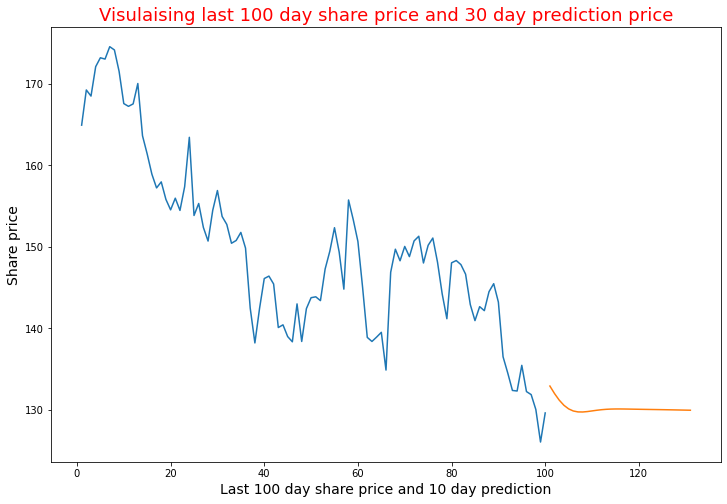

In [147]:
# Visulaising last 100 day share price and 30 day prediction price
plt.figure(figsize=(12,8))
plt.title("Visulaising last 100 day share price and 30 day prediction price", color=  'r', fontsize=18  )
plt.plot(day_new, data.Close[len(data)-100:])
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.xlabel("Last 100 day share price and 10 day prediction" , fontsize=14)
plt.ylabel("Share price", fontsize=14)
plt.show()


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0, 0.5, 'Price')

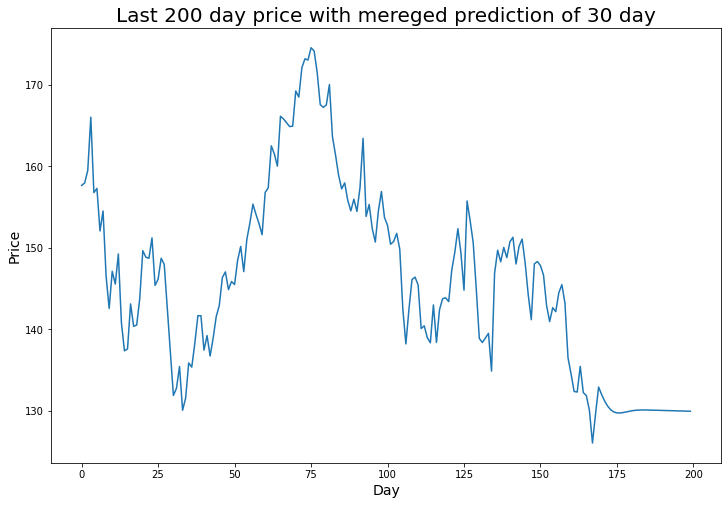

In [177]:
data_=data.Close.tolist()
data_.extend(scaler.inverse_transform(lst_output))

plt.figure(figsize=(12,8))
plt.plot(data_[len(data_)-200:])
plt.title("Last 200 day price with mereged prediction of 30 day", fontsize= 20)
plt.xlabel("Day", fontsize = 14)
plt.ylabel("Price", fontsize = 14)

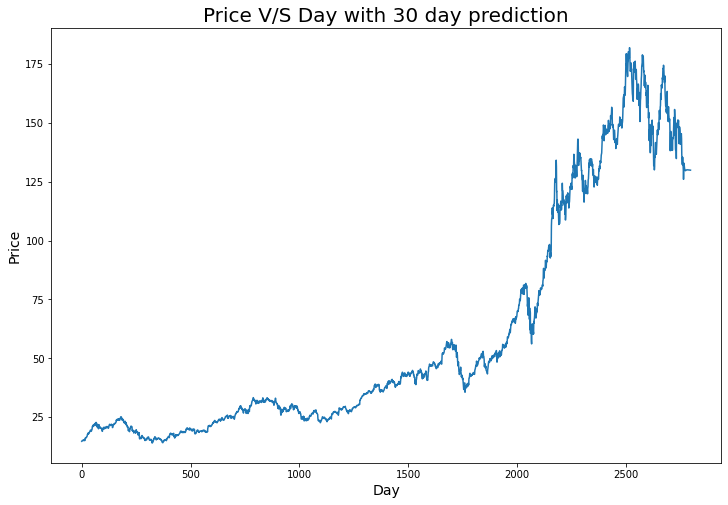

In [178]:
plt.figure(figsize=(12,8))
plt.title("Price V/S Day with 30 day prediction", fontsize= 20)
plt.xlabel("Day", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.plot(data_)